In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv('full_onion_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)


In [5]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")

In [6]:
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


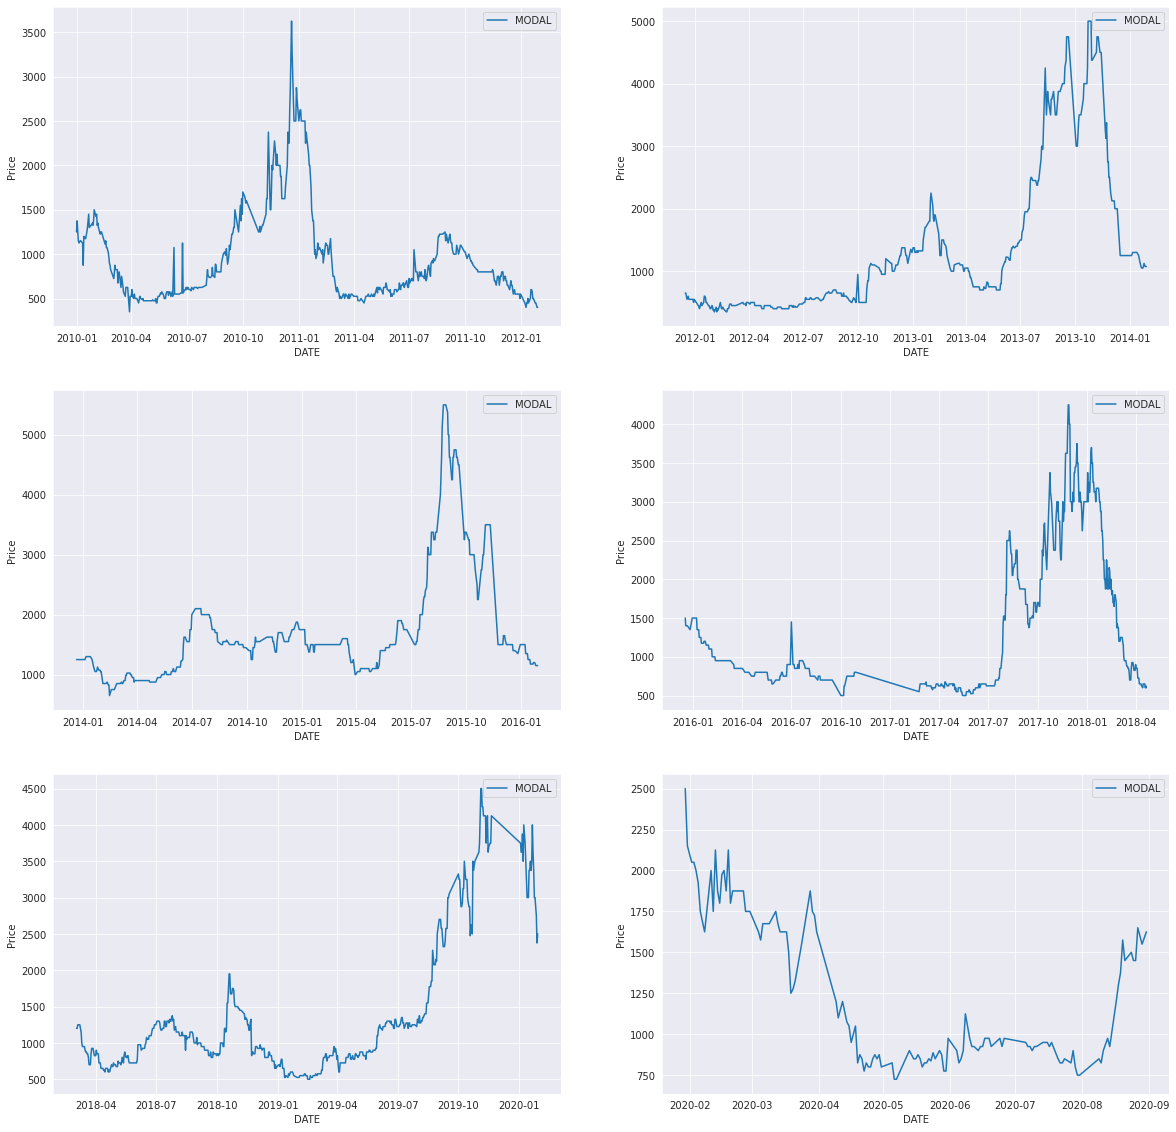

In [7]:
import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(3,2, figsize=(20,20))
sns.lineplot(data= df[2194:], ax= axes[0,0])
sns.lineplot(data= df[1715:2220], ax= axes[0,1])
sns.lineplot(data= df[1275:1740], ax= axes[1,0])
sns.lineplot(data= df[700:1300], ax= axes[1,1])
sns.lineplot(data= df[144:750], ax= axes[2,0])
sns.lineplot(data= df[:144], ax= axes[2,1])
axes[0,0].set_ylabel('Price')
axes[0,1].set_ylabel('Price')
axes[1,0].set_ylabel('Price')
axes[1,1].set_ylabel('Price')
axes[2,0].set_ylabel('Price')
axes[2,1].set_ylabel('Price')
plt.show()

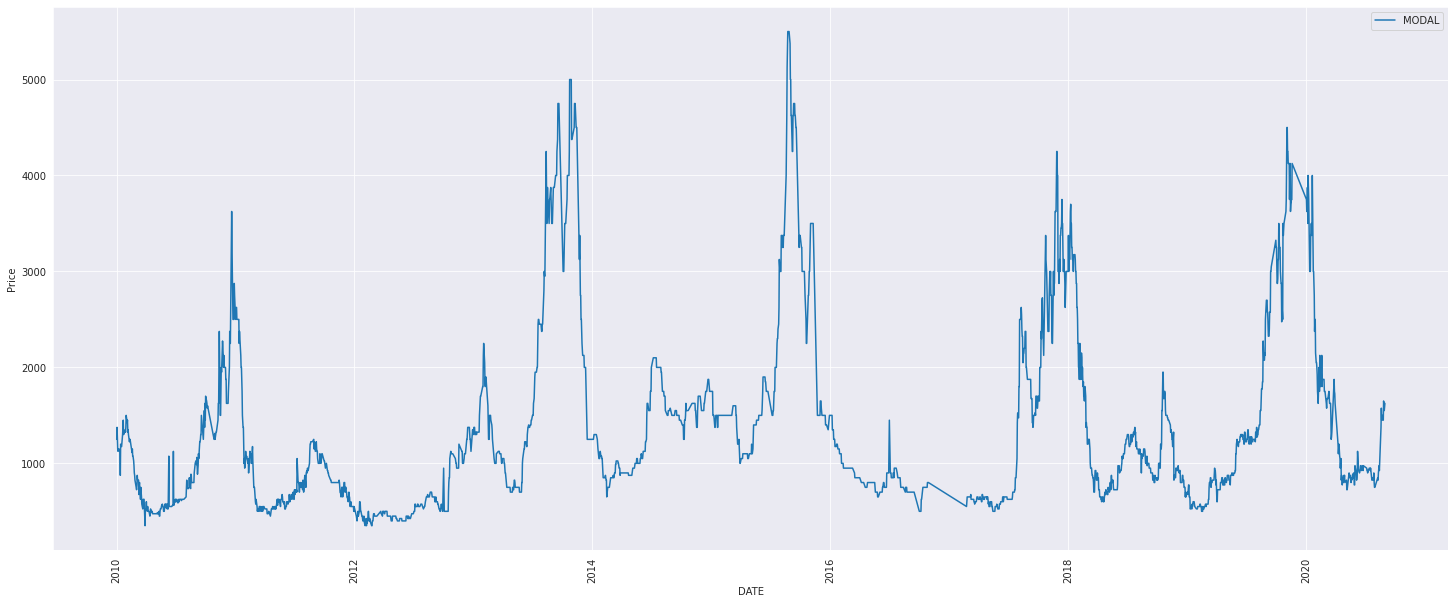

In [8]:
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df, ax= ax)
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Month Resample plots


In [9]:
month_sampled = df.resample('1M')

In [10]:
# month_sampled = month_sampled.interpolate(method='linear')
month_sampled = month_sampled.mean()


In [11]:
month_sampled.head(10)

,MODAL
DATE,
2010-01-31,1246.250000
2010-02-28,1173.000000
2010-03-31,678.571429
2010-04-30,497.875000
2010-05-31,511.285714
2010-06-30,611.227273
2010-07-31,616.200000
2010-08-31,807.950000
2010-09-30,1229.777778


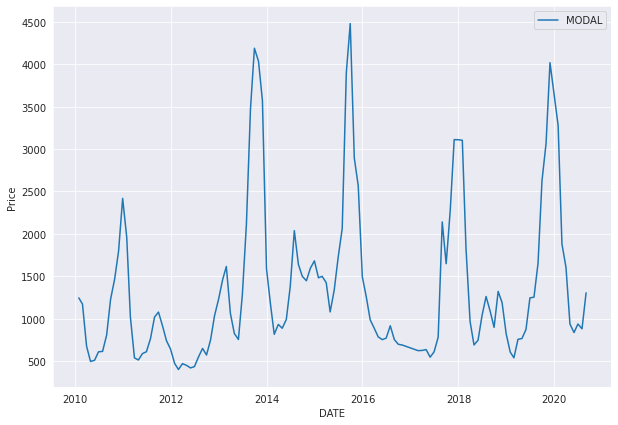

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = month_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

In [13]:
year_sampled = df.resample('1Y')
year_sampled = year_sampled.mean()
year_sampled.head(10)

,MODAL
DATE,
2010-12-31,1053.514894
2011-12-31,868.092827
2012-12-31,602.610879
2013-12-31,2001.687764
2014-12-31,1358.411504
2015-12-31,2151.401869
2016-12-31,860.512821
2017-12-31,1499.221453
2018-12-31,1251.478873


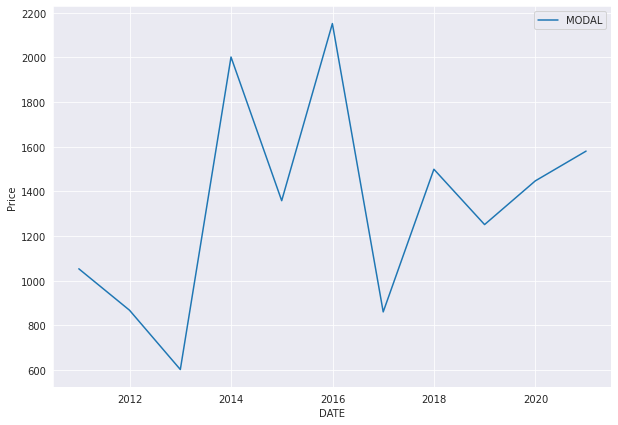

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = year_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

### Interpolation of data to 1D fequency

In [73]:
Interpolated_df = df.resample('1D').interpolate(mehod= "linear")

### Moving average plot for smoothening of curve


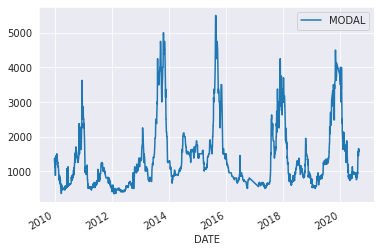

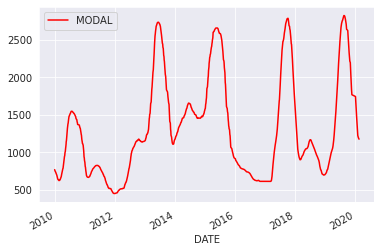

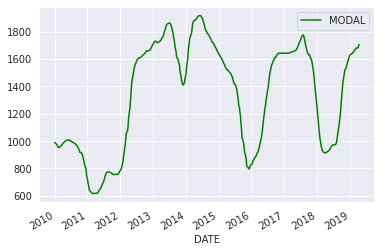

In [20]:
#window size is 365 days
half_year_rolling_df = df.rolling(window= 130)
half_year_rolling_mean_df = half_year_rolling_df.mean()
df.plot()
half_year_rolling_mean_df.plot(color= 'red')
full_year_rolling_df = df.rolling(window= 365)
full_year_rolling_mean_df = full_year_rolling_df.mean()
full_year_rolling_mean_df.plot(color= 'green')
plt.show()

In [74]:
Interpolated_df.to_csv("index_onion_data.csv")

In [75]:
indexed_df = pd.read_csv("index_onion_data.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
indexed_df.head()

DATE
2010-01-01    1250.0
2010-01-02    1375.0
2010-01-03    1262.5
2010-01-04    1150.0
2010-01-05    1125.0
Name: MODAL, dtype: float64

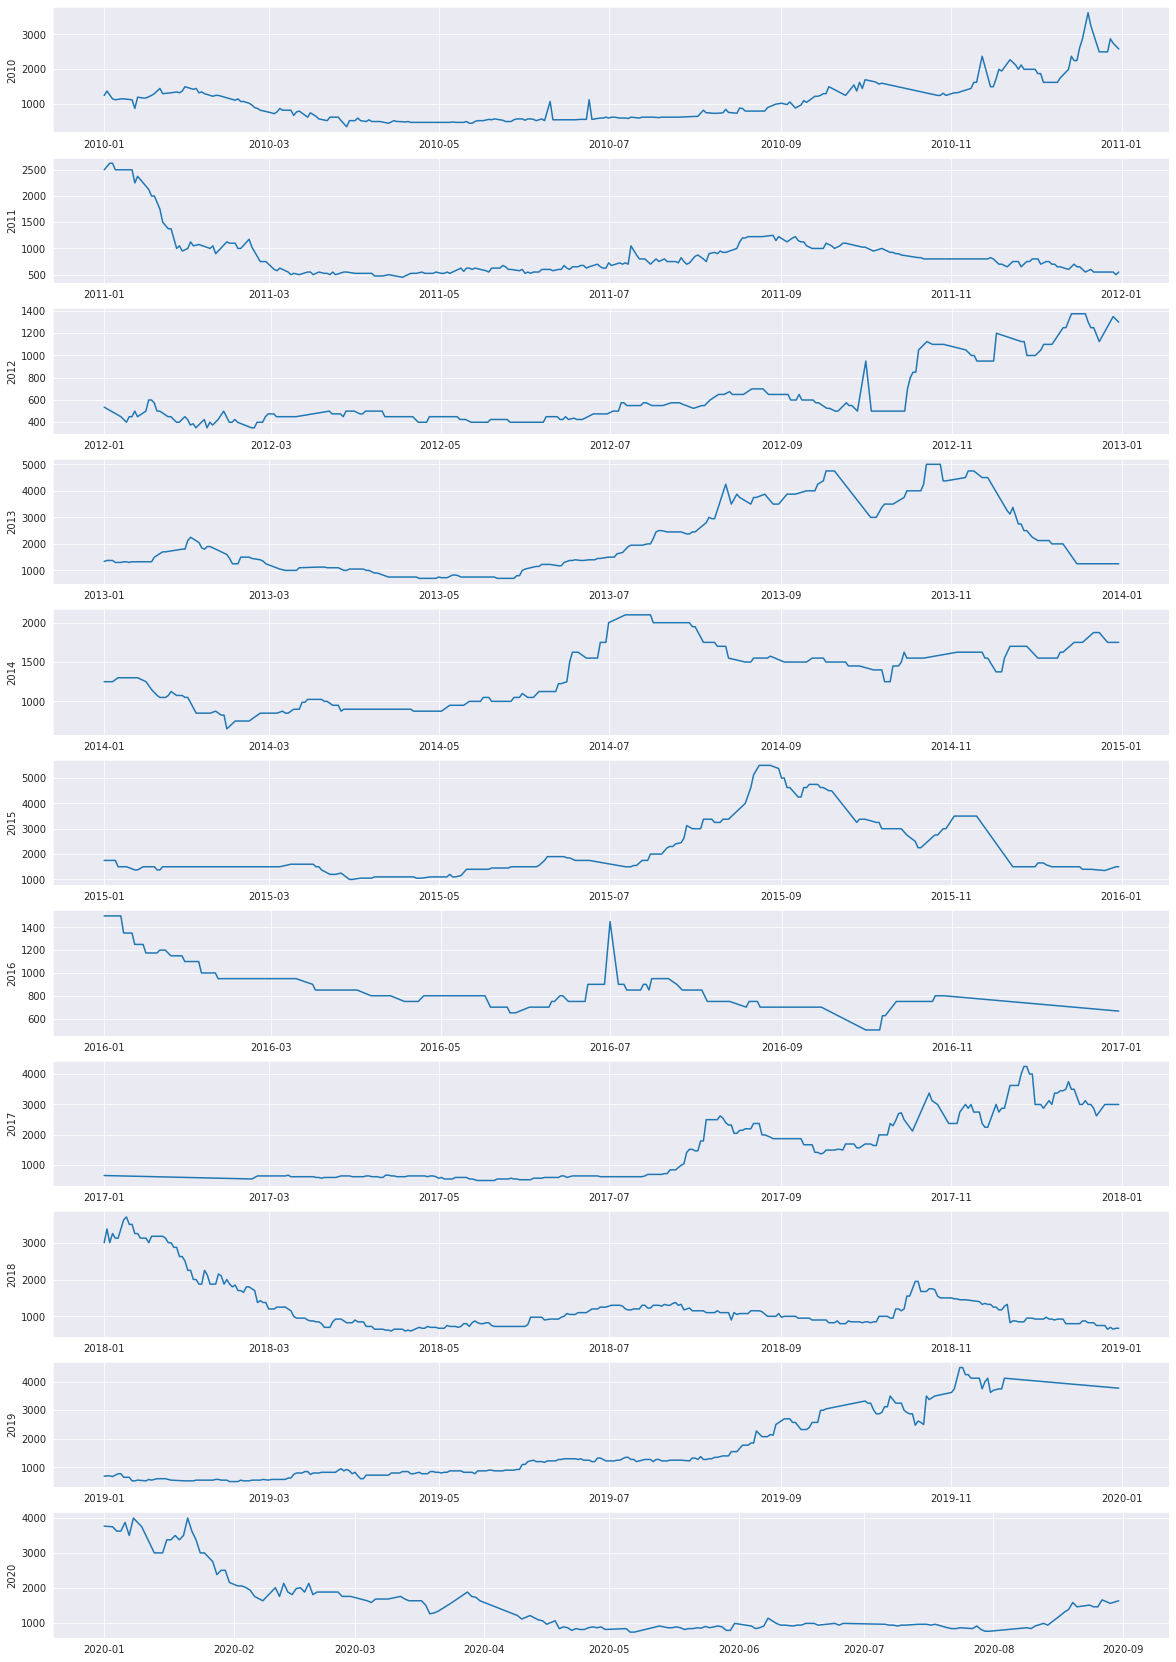

In [83]:
groups = indexed_df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(len(years),1, figsize=(20,30))
i = 0
for year in years:
    sns.lineplot(data= years[year], ax= axes[i])
    axes[i].set_ylabel(year)
    i += 1

### Distribution of prices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f707202c400>]],
      dtype=object)

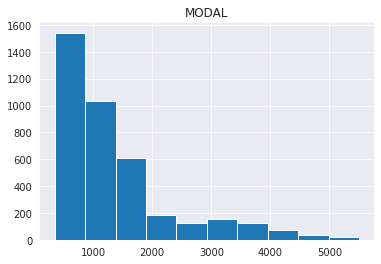

In [86]:
import math
Interpolated_df.hist()

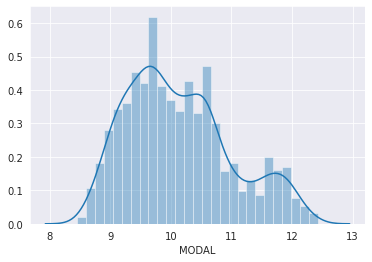

In [91]:
sns.distplot( Interpolated_df['MODAL'].apply(lambda x: math.log2(x)))

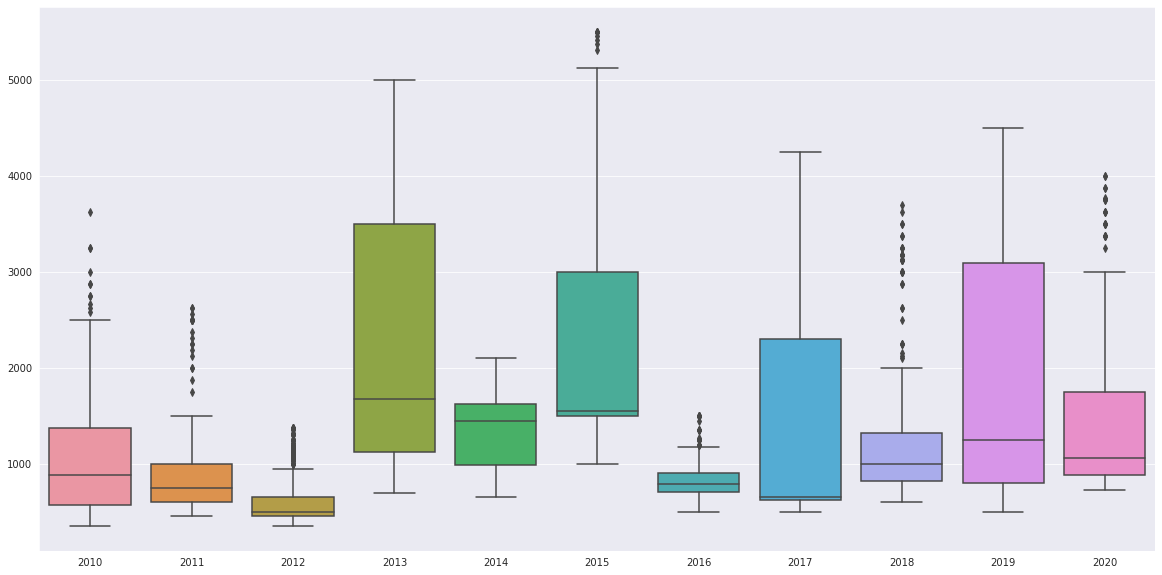

In [108]:
groups = indexed_df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(figsize=(20,10))
i = 0
labels = [i for i in range(2010,2021)]
sns.boxplot(data=list(years.values()), ax= axes)
axes.set_xticklabels(labels)
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)